# Machine Learning Final Project

In [3]:
# Importing necessary libraries for data analysis and machine learning

# Pandas for data manipulation and analysis
import pandas as pd

# Matplotlib and Seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Datetime for working with dates and times
from datetime import datetime

# KMeans algorithm for clustering
from sklearn.cluster import KMeans

# StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

# train_test_split for splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split

# LabelEncoder for converting categorical labels to numerical format
from sklearn.preprocessing import LabelEncoder

# KNeighborsClassifier for K-Nearest Neighbors classification
from sklearn.neighbors import KNeighborsClassifier

# GaussianNB for Naive Bayes classification
from sklearn.naive_bayes import GaussianNB

# LogisticRegression for logistic regression classification
from sklearn.linear_model import LogisticRegression

# RandomForestRegressor for regression
from sklearn.ensemble import RandomForestClassifier 


# Metrics for evaluating machine learning models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("new_marketing_campaign.csv")
df.head().T

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014
Recency,58,38,26,26,94
MntWines,635,11,426,11,173


# Data Cleaning 

In [5]:
# Dropping columns from the DataFrame
df = df.drop(['ID','Recency','Z_CostContact','Z_Revenue'], axis=1)

In [6]:
# Renaming columns in the DataFrame for better clarity and consistency
df = df.rename(columns={'MntWines': "Wines",
                            'MntFruits':'Fruits',
                            'MntMeatProducts':'Meat',
                            'MntFishProducts':'Fish',
                            'MntSweetProducts':'Sweets',
                            'MntGoldProds':'Gold',
                            'NumDealsPurchases':'Deals',
                           'NumWebPurchases': 'Web',
                            'NumCatalogPurchases':'Catalog',
                            'NumStorePurchases':'Store',
                            'NumWebVisitsMonth':'Web_Visits',
                            'AcceptedCmp1':'Campaign_1',
                        'AcceptedCmp2':'Campaign_2',
                        'AcceptedCmp3':'Campaign_3',
                        'AcceptedCmp4':'Campaign_4',
                        'AcceptedCmp5':'Campaign_5',
                       
                       })

In [7]:
df.head().T

,0,1,2,3,4
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014
Wines,635,11,426,11,173
Fruits,88,1,49,4,43
Meat,546,6,127,20,118


In [8]:
df = df.fillna(df.median())

C:\Users\Acer\AppData\Local\Temp\ipykernel_28740\3493596106.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


In [9]:
# Check for missing values in each column of the DataFrame (df) and sum the number of null values in each column.
df.isnull().sum()

Year_Birth        0
Education         0
Marital_Status    0
Income            0
Kidhome           0
Teenhome          0
Dt_Customer       0
Wines             0
Fruits            0
Meat              0
Fish              0
Sweets            0
Gold              0
Deals             0
Web               0
Catalog           0
Store             0
Web_Visits        0
Campaign_3        0
Campaign_4        0
Campaign_5        0
Campaign_1        0
Campaign_2        0
Complain          0
Response          0
dtype: int64

In [10]:
#Dropping Na values
df.dropna().T

,0,1,2,3,4,5,6,7,8,9,...,2230,2231,2232,2233,2234,2235,2236,2237,2238,2239
Year_Birth,1957,1954,1965,1984,1981,1967,1971,1985,1974,1950,...,1984,1970,1986,1977,1974,1967,1946,1981,1956,1954
Education,Graduation,Graduation,Graduation,Graduation,PhD,Master,Graduation,PhD,PhD,PhD,...,Graduation,Master,Graduation,Graduation,Graduation,Graduation,PhD,Graduation,Master,PhD
Marital_Status,Single,Single,Together,Together,Married,Together,Divorced,Married,Together,Together,...,Single,Single,Single,Together,Married,Married,Together,Divorced,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0,62513.0,55635.0,33454.0,30351.0,5648.0,...,11012.0,44802.0,26816.0,666666.0,34421.0,61223.0,64014.0,56981.0,69245.0,52869.0
Kidhome,0,1,0,1,1,0,0,1,1,1,...,1,0,0,1,1,0,2,0,0,1
Teenhome,0,1,0,0,0,1,1,0,0,1,...,0,0,0,0,0,1,1,0,1,1
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014,09-09-2013,13-11-2012,08-05-2013,06-06-2013,13-03-2014,...,16-03-2013,21-08-2012,17-08-2012,02-06-2013,01-07-2013,13-06-2013,10-06-2014,25-01-2014,24-01-2014,15-10-2012
Wines,635,11,426,11,173,520,235,76,14,28,...,24,853,5,9,3,709,406,908,428,84
Fruits,88,1,49,4,43,42,65,10,0,0,...,3,10,1,14,3,43,0,48,30,3
Meat,546,6,127,20,118,98,164,56,24,6,...,26,143,6,18,7,182,30,217,214,61


In [11]:
# Check for missing values in each column of the DataFrame (df) and sum the number of null values in each column.
df.isnull().sum()

Year_Birth        0
Education         0
Marital_Status    0
Income            0
Kidhome           0
Teenhome          0
Dt_Customer       0
Wines             0
Fruits            0
Meat              0
Fish              0
Sweets            0
Gold              0
Deals             0
Web               0
Catalog           0
Store             0
Web_Visits        0
Campaign_3        0
Campaign_4        0
Campaign_5        0
Campaign_1        0
Campaign_2        0
Complain          0
Response          0
dtype: int64

In [12]:
df.sample(15)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Wines,Fruits,Meat,...,Catalog,Store,Web_Visits,Campaign_3,Campaign_4,Campaign_5,Campaign_1,Campaign_2,Complain,Response
1016,1965,2n Cycle,Married,70924.0,0,0,07-04-2014,635,114,254,...,6,7,3,0,0,1,0,0,0,0
762,1988,Master,Married,78285.0,0,0,28-10-2013,647,107,391,...,4,10,3,0,0,0,0,0,0,0
1925,1977,Master,Married,22701.0,1,0,05-09-2013,2,4,9,...,0,3,5,0,0,0,0,0,0,0
1079,1978,PhD,Married,41014.0,1,0,22-04-2013,7,2,6,...,0,2,7,0,0,0,0,0,0,0
1320,1960,Master,Married,81843.0,0,0,22-04-2013,779,86,537,...,9,12,3,0,0,0,0,0,0,0
875,1953,Graduation,Together,80812.0,0,0,17-09-2013,769,22,500,...,8,5,2,1,0,1,1,0,0,0
1627,1963,PhD,Divorced,41003.0,0,0,17-03-2013,123,133,142,...,2,8,6,0,0,0,0,0,0,0
207,1963,Master,Divorced,48721.0,1,1,13-05-2013,81,18,113,...,2,5,6,0,0,0,0,0,0,0
550,1963,2n Cycle,Single,39548.0,1,1,31-03-2014,15,4,10,...,1,3,3,0,0,0,0,0,0,0
231,1962,2n Cycle,Divorced,81975.0,0,1,05-01-2013,983,76,184,...,3,4,7,0,0,1,0,0,0,0


# Checking correlation between the attributes

C:\Users\Acer\AppData\Local\Temp\ipykernel_28740\1982176802.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


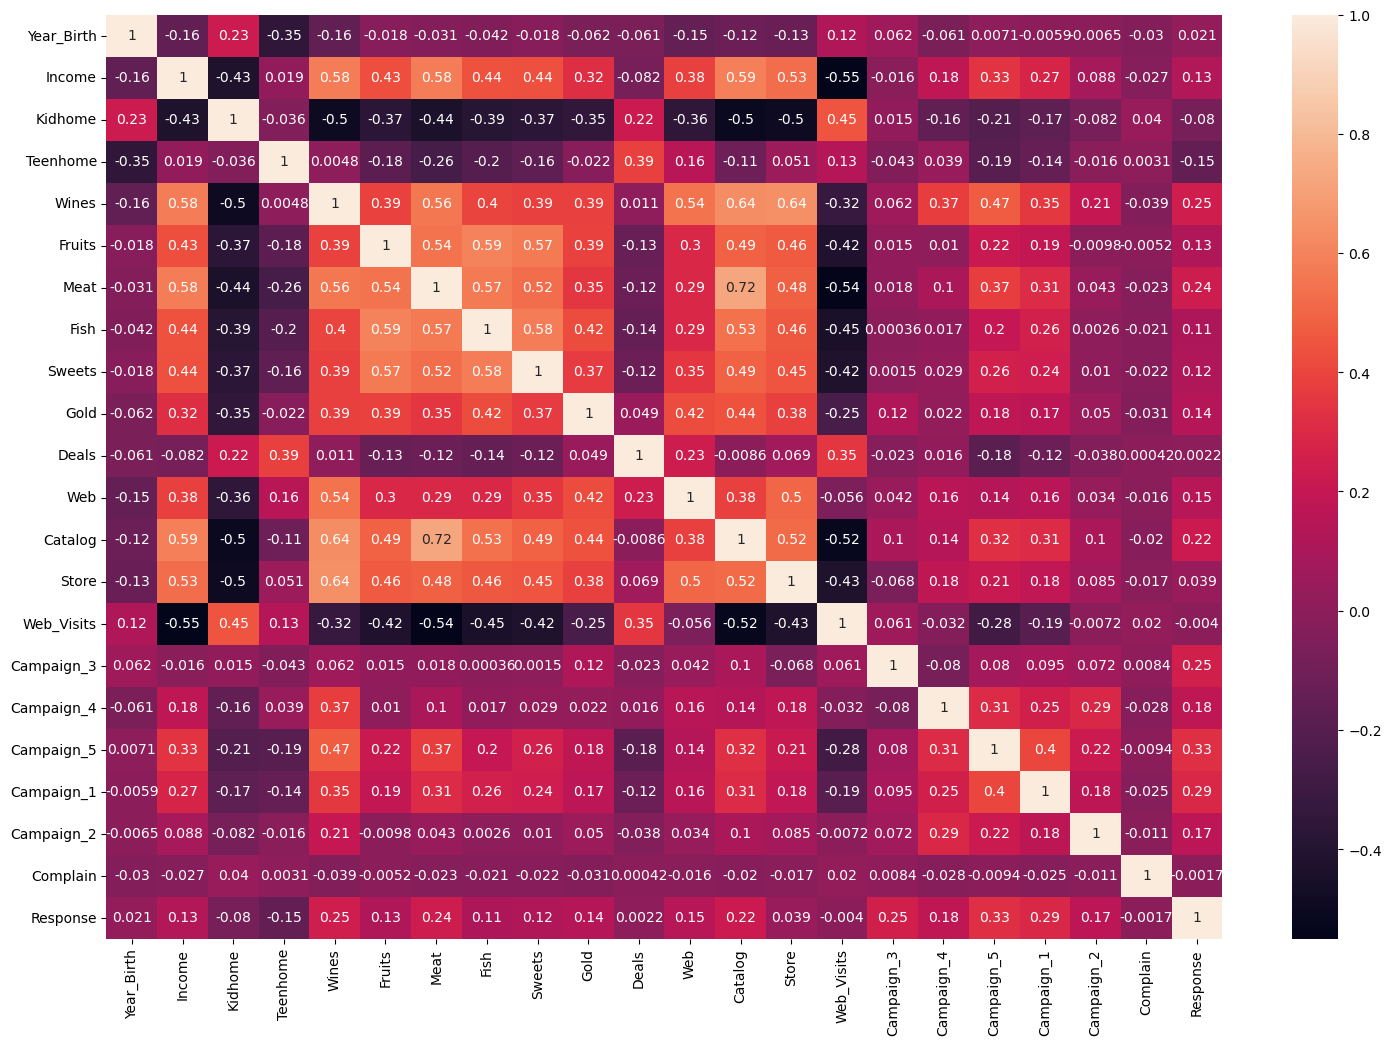

In [13]:
# Creating a heatmap to visualize the correlation matrix of the DataFrame 'df'
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Age Distribution

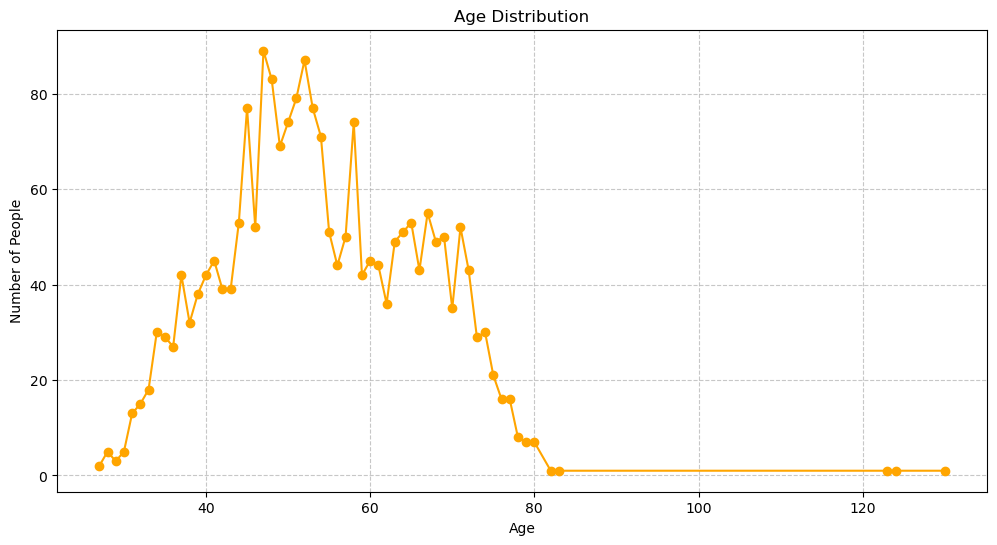

In [14]:
# Convert 'Year_Birth' to datetime and calculate age
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format='%Y')
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth'].dt.year

# Count the number of people in each age group
age_distribution = df['Age'].value_counts().sort_index()

# Plot the age distribution as a line graph
plt.figure(figsize=(12, 6))
plt.plot(age_distribution.index, age_distribution.values, marker='o', linestyle='-', color='orange')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

# Marital Status Distribution

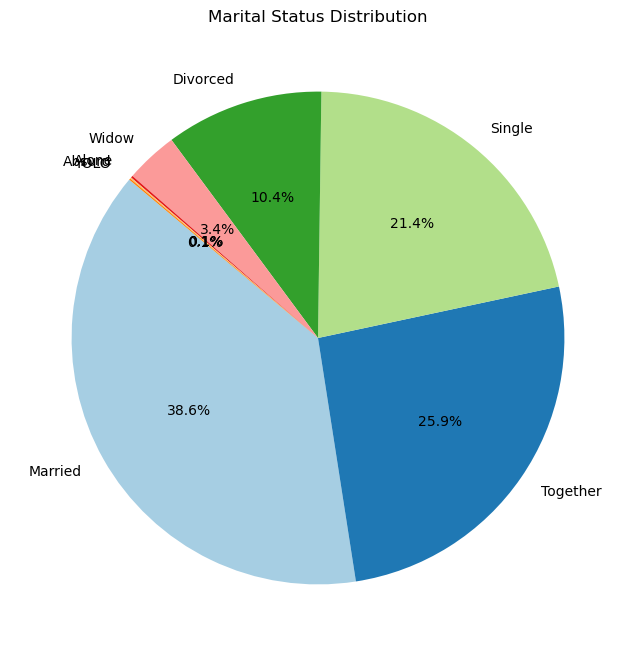

In [15]:
# Count the occurrences of each marital status
marital_status_counts = df['Marital_Status'].value_counts()

# Calculate the percentage distribution
marital_status_percentage = marital_status_counts / marital_status_counts.sum() * 100

# Plotting the Marital Status Distribution as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(marital_status_percentage, labels=marital_status_percentage.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Marital Status Distribution')
plt.show()

# Customer Response On The Campaigns 


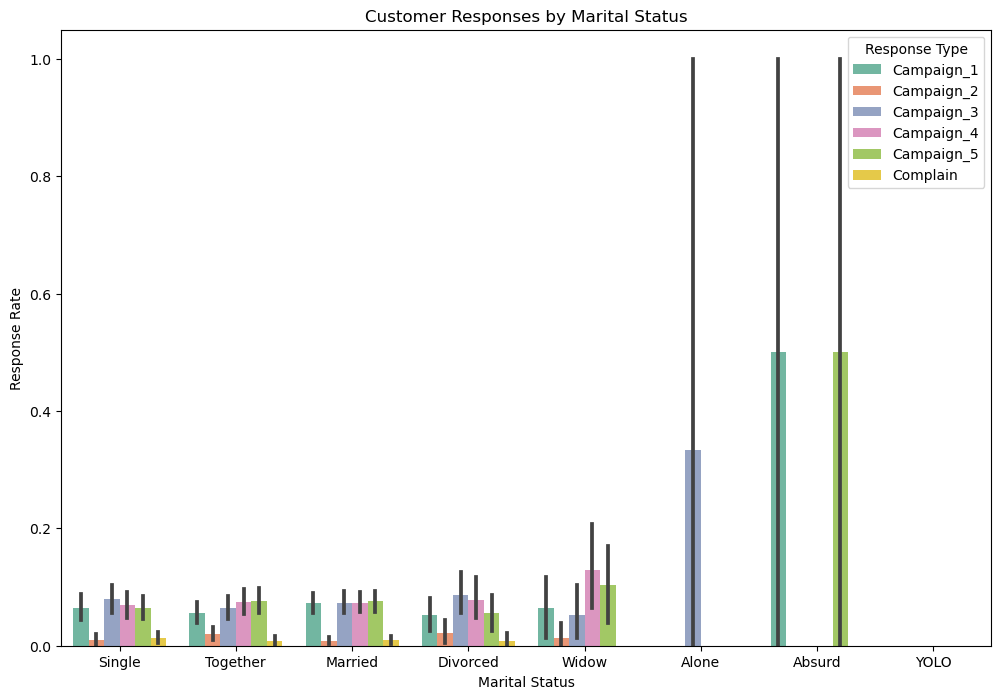

In [16]:
# Filter relevant columns
selected_columns = ['Marital_Status', 'Campaign_1', 'Campaign_2', 'Campaign_3', 'Campaign_4', 'Campaign_5', 'Complain']
df_selected = df[selected_columns]

# Melt the DataFrame to convert it to long format
df_melted = pd.melt(df_selected, id_vars='Marital_Status', var_name='Response_Type', value_name='Response')

# Plot grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Marital_Status', y='Response', hue='Response_Type', data=df_melted, palette='Set2')
plt.title('Customer Responses by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Response Rate')
plt.legend(title='Response Type')
plt.show()

# Average Consumption of Products by Matital Status

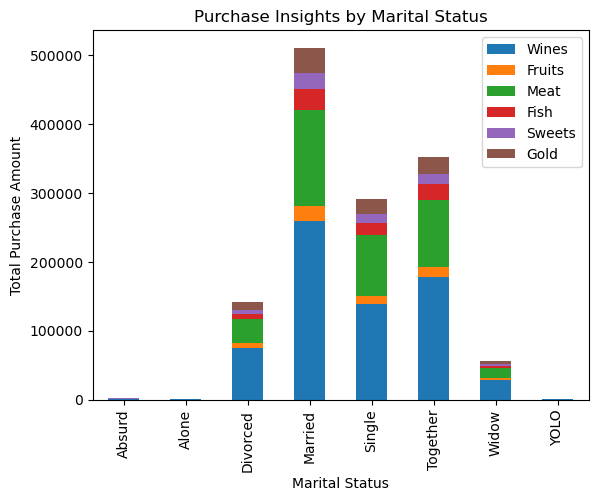

In [17]:
# Assuming your data is stored in a DataFrame called 'df'
# If it's not already loaded, you can load it using pd.read_csv('your_data.csv')

# Create a new DataFrame for purchase data based on marital status
purchase_data = df[['Marital_Status', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']]

# Group by marital status and calculate the total purchase amounts
purchase_by_marital = purchase_data.groupby('Marital_Status').sum()

# Plot the data
purchase_by_marital.plot(kind='bar', stacked=True)
plt.title('Purchase Insights by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Purchase Amount')
plt.show()


# Average Consumption of Products by Age

Text(0, 0.5, 'Average\xa0Consumption')

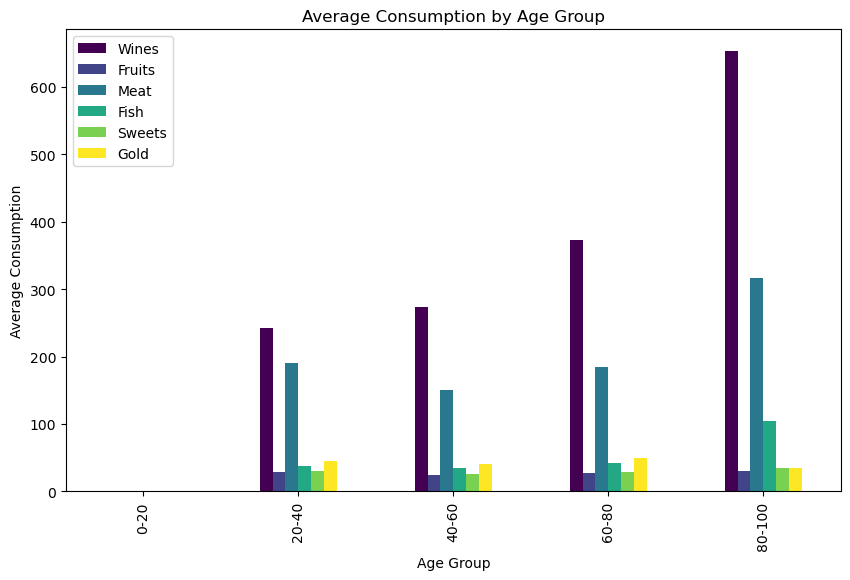

In [18]:
# Define bins and labels for age groups
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '20-40', '40-60', '60-80', '80-100']

# Create a new column 'Age_Group' in the DataFrame based on the age bins
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate the average consumption of each product by age group
avg_consumption_by_age = df.groupby('Age_Group')[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']].mean()

# Plot the graph
ax = avg_consumption_by_age.plot(kind='bar', figsize=(10, 6), colormap='viridis')
ax.set_title('Average Consumption by Age Group')
ax.set_xlabel('Age Group')
ax.set_ylabel('Average Consumption')

Text(0.5, 1.0, 'Consumption platform by Age')

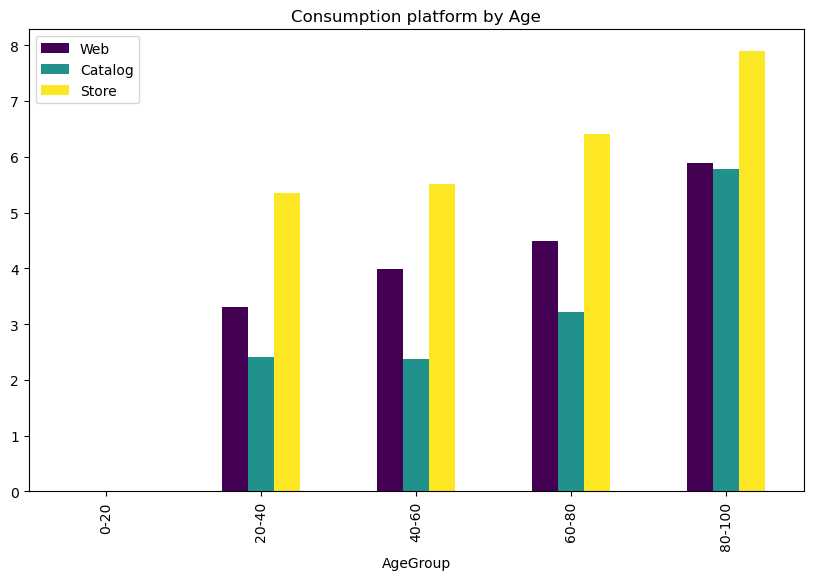

In [19]:
# Calculate the total consumption for each product by age group

# Create a new column 'AgeGroup' in the DataFrame based on age bins
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group the DataFrame by 'AgeGroup' and calculate the average consumption for each platform
avg_consumption_by_age = df.groupby('AgeGroup')[['Web', 'Catalog', 'Store']].mean()

# Plot the graph
ax = avg_consumption_by_age.plot(kind='bar', figsize=(10, 6), colormap='viridis')
ax.set_title('Consumption platform by Age')

# Total Responses to Marketing Campaigns by Marital Status

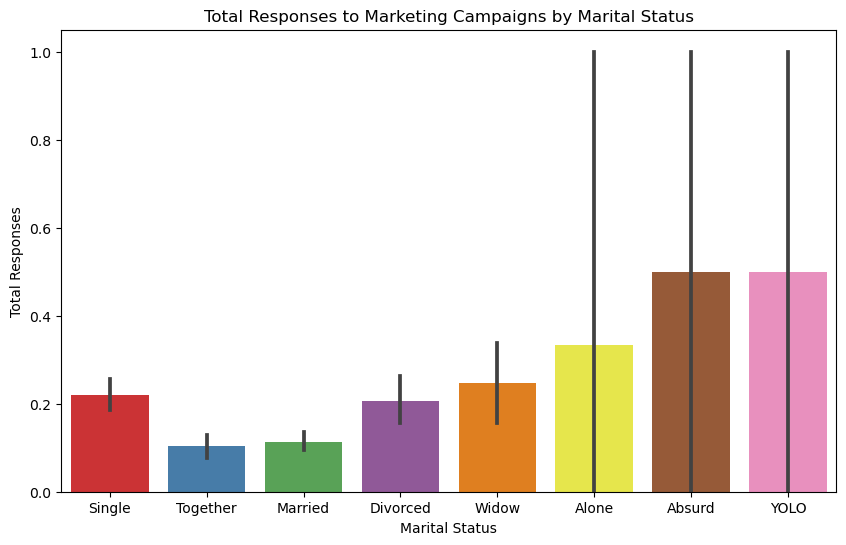

In [20]:
# Sum the responses for each marketing campaign
df['TotalResponses'] = df[['Campaign_1', 'Campaign_2', 'Campaign_3', 'Campaign_4', 'Campaign_5']].sum(axis=1)

# Plotting
plt.figure(figsize=(10, 6))

# Create a bar plot using Seaborn, showing total responses based on marital status
sns.barplot(x='Marital_Status', y='Response', data=df, palette='Set1')

# Set labels and title for better readability
plt.xlabel('Marital Status')
plt.ylabel('Total Responses')
plt.title('Total Responses to Marketing Campaigns by Marital Status')

# Display the plot
plt.show()

# Distribution of People with Graduation Education Based on Marital Status 

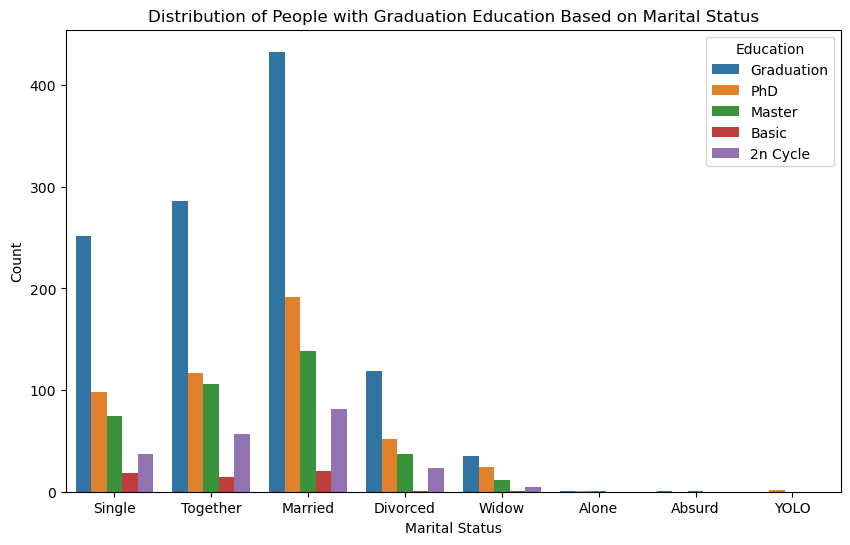

In [21]:
# Create a countplot using seaborn
plt.figure(figsize=(10, 6))

# Using seaborn's countplot to visualize the distribution of people with Graduation Education based on Marital Status
sns.countplot(x='Marital_Status', hue='Education', data=df)

# Adding a title to the plot
plt.title('Distribution of People with Graduation Education Based on Marital Status')

# Adding labels to the x and y axis
plt.xlabel('Marital Status')
plt.ylabel('Count')

# Display the plot
plt.show()

# ALGORITHMS



In [26]:
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])
# For demonstration purposes, let's assume 'Response' is the target variable
X = df[['Marital_Status','Age','Campaign_1', 'Campaign_2', 'Campaign_3', 'Campaign_4', 'Campaign_5']]  # Features
y = df['Response']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN

KNN Accuracy: 0.8325892857142857

Confusion Matrix:
[[361  18]
 [ 57  12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.91       379
           1       0.40      0.17      0.24        69

    accuracy                           0.83       448
   macro avg       0.63      0.56      0.57       448
weighted avg       0.79      0.83      0.80       448



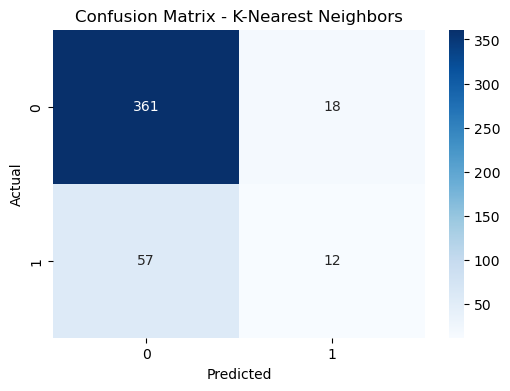

In [27]:
# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn_model.fit(X_train, y_train)

# Make predictions
knn_predictions = knn_model.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_predictions)
conf_matrix = confusion_matrix(y_test, knn_predictions)
classification_rep = classification_report(y_test,knn_predictions)
print(f'KNN Accuracy: {knn_accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.show()

# Naive Bayes

In [ ]:
# Initialize Naive Bayes model
nb_model = GaussianNB()

# Fit the model
nb_model.fit(X_train, y_train)

# Make predictions
nb_predictions = nb_model.predict(X_test)

# Evaluate the model
nb_accuracy = accuracy_score(y_test, nb_predictions)

#Evaluate the model
knn_accuracy = accuracy_score(y_test, nb_predictions)
conf_matrix = confusion_matrix(y_test, nb_predictions)
classification_rep = classification_report(y_test,nb_predictions)
print(f'Naive Bayes Accuracy: {nb_accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

# Logistic regression 

In [ ]:

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the logistic regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f'Logistic Regression Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust parameters like n_estimators
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f'RFC Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()